<a href="https://colab.research.google.com/github/marcoapedroza/python-stock-analysis-ML-AI/blob/main/predictingStockPrices_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Stock Prices - Machine Learning Model

## Understand the problem statement and business case:
*   In this project, I will train a **Machine Learning Model** to predict future stock prices;
*   By accurately predicting stock prices, investors can maximize returns and know when to buy/sell securities;
*   The ML model will be trained using **historical stock price data** along with the **volume** of transactions;
*   I will use the **Ridge Regression Model (L2 Regularization)**;

- **Ridge Regression** is a technique for analyzing multiple regression data that suffer from **multicollinearity**;
- When multicollinearity occurs, **least squares estimates** are unbiased, but their variances are large so they may be far from the true value;
- By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors (generalization capability);
- **Ridge Regression** overcomes overfitting.

### Import datasets and libraries:

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tickers = 'ABEV3.SA B3SA3.SA BBDC3.SA BRKM5.SA CCRO3.SA ELET3.SA EMBR3.SA MGLU3.SA LAME4.SA PETR3.SA'
ticker = '^BVSP'

# Adjusted Close Stock Prices
bovespa = yf.download(ticker, start="2013-01-01")['Adj Close']
stock_prices = yf.download(tickers, start="2013-01-01")['Adj Close']
stock_prices.dropna(how='all', inplace=True)
stock_prices = pd.merge(stock_prices, bovespa, on='Date')
stock_prices.columns = ['ABEV3', 'B3SA3', 'BBDC3', 'BRKM5', 'CCRO3', 'ELET3', 'EMBR3', 'LAME4', 'MGLU3', 'PETR3', 'BOVESPA']
stock_prices

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed


,ABEV3,B3SA3,BBDC3,BRKM5,CCRO3,ELET3,EMBR3,LAME4,MGLU3,PETR3,BOVESPA
Date,,,,,,,,,,,
2013-01-02,12.468795,10.506537,11.001677,9.456411,13.490131,4.073360,13.784053,10.699188,0.362545,17.815228,62550.0
2013-01-03,12.689861,10.506537,11.605797,9.657761,13.730900,4.224673,13.624968,10.699188,0.377499,18.479706,63312.0
2013-01-04,12.480665,10.312937,11.577574,9.560557,13.971669,4.273094,13.344234,10.699188,0.375242,18.542559,62523.0
2013-01-07,12.624581,10.260814,11.304679,9.435583,13.957504,4.230726,13.456529,10.699188,0.366495,18.300117,61933.0
2013-01-08,12.609744,10.350169,11.267038,9.414756,13.950422,3.873626,12.885703,10.699188,0.363956,17.779306,61128.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,14.020000,54.299999,20.572170,31.260000,11.250000,32.410000,12.230000,24.910000,24.180000,22.150000,110035.0
2021-03-01,13.770000,54.349998,19.902750,31.780001,10.920000,31.540001,12.210000,24.680000,24.549999,22.010000,110335.0
2021-03-02,13.990000,56.009998,20.250000,30.510000,10.880000,31.920000,12.420000,24.250000,24.270000,21.910000,111540.0


In [ ]:
# Checking null values
stock_prices.isnull().sum()

ABEV3      0
B3SA3      0
BBDC3      0
BRKM5      0
CCRO3      0
ELET3      0
EMBR3      0
LAME4      0
MGLU3      0
PETR3      0
BOVESPA    0
dtype: int64

In [ ]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2018 entries, 2013-01-02 to 2021-03-04
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ABEV3    2018 non-null   float64
 1   B3SA3    2018 non-null   float64
 2   BBDC3    2018 non-null   float64
 3   BRKM5    2018 non-null   float64
 4   CCRO3    2018 non-null   float64
 5   ELET3    2018 non-null   float64
 6   EMBR3    2018 non-null   float64
 7   LAME4    2018 non-null   float64
 8   MGLU3    2018 non-null   float64
 9   PETR3    2018 non-null   float64
 10  BOVESPA  2018 non-null   float64
dtypes: float64(11)
memory usage: 189.2 KB


In [ ]:
stock_prices.describe()

,ABEV3,B3SA3,BBDC3,BRKM5,CCRO3,ELET3,EMBR3,LAME4,MGLU3,PETR3,BOVESPA
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,15.383136,22.012050,16.988817,24.137017,12.910802,14.931791,18.185447,16.377399,4.304004,17.681847,70731.682111
std,2.420670,15.484989,5.495908,12.633481,2.000835,10.755170,4.800080,5.468726,6.809386,6.648675,21828.529802
min,10.694901,7.134462,8.493078,7.464851,6.946203,2.880558,6.030000,8.767794,0.029213,5.541526,37497.000000
25%,12.901473,9.715415,12.293642,12.247512,11.705986,4.831934,16.104088,12.594509,0.209049,12.939808,52442.500000
50%,15.737720,16.564059,15.874840,22.024253,13.013364,13.092043,18.506442,15.358346,0.470104,15.851011,62840.500000
75%,16.943798,29.620212,20.524171,32.287373,14.192291,21.412553,21.276763,18.445795,5.225330,22.303133,86945.500000
max,22.276297,65.891556,31.260302,55.835045,19.331476,40.054550,29.471241,36.209534,27.421442,32.011372,125077.000000


In [ ]:
ticker_list = ['ABEV3.SA', 'B3SA3.SA', 'BBDC3.SA', 'BRKM5.SA', 'CCRO3.SA', 'ELET3.SA', 'EMBR3.SA', 'LAME4.SA', 'MGLU3.SA', 'PETR3.SA', '^BVSP']
stock_volumes = {}
for i in ticker_list:
  stock = yf.Ticker(i)
  stock_volumes[i] = stock.history(start="2013-01-01")['Volume']

stock_volumes = pd.DataFrame(stock_volumes)
stock_volumes.columns = ['ABEV3', 'B3SA3', 'BBDC3', 'BRKM5', 'CCRO3', 'ELET3', 'EMBR3', 'LAME4', 'MGLU3', 'PETR3', 'BOVESPA']
stock_volumes

,ABEV3,B3SA3,BBDC3,BRKM5,CCRO3,ELET3,EMBR3,LAME4,MGLU3,PETR3,BOVESPA
Date,,,,,,,,,,,
2013-01-02,1126114.0,11064300.0,2602296.0,2804100.0,3288600.0,3071866.0,2206900.0,0.0,23622400.0,10258500.0,3739800.0
2013-01-03,1032105.0,8380900.0,4885249.0,2414300.0,2501600.0,3234228.0,2323400.0,0.0,30777600.0,7823900.0,3355800.0
2013-01-04,1488651.0,13990200.0,2992734.0,2541200.0,4681500.0,9874150.0,2179500.0,0.0,17756800.0,16028100.0,6233800.0
2013-01-07,1223124.0,7149400.0,2409758.0,1717400.0,3609400.0,4051739.0,1242600.0,0.0,23110400.0,10473900.0,3985800.0
2013-01-08,1103112.0,12690100.0,3090168.0,1309400.0,4516000.0,3794841.0,3511500.0,0.0,27945600.0,10505300.0,3840600.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,33969400.0,29567900.0,10127100.0,4101200.0,19692800.0,8549300.0,17922400.0,13418000.0,45690100.0,47419800.0,14618500.0
2021-03-01,19850200.0,14192200.0,6306500.0,5013800.0,8929400.0,9211600.0,14282400.0,8992500.0,22131200.0,40852500.0,11239900.0
2021-03-02,42904000.0,35949300.0,10606200.0,4770600.0,17453500.0,10829700.0,16942600.0,14144900.0,35351400.0,52848600.0,14823200.0


In [ ]:
stock_volumes.isna().sum()

ABEV3      1
B3SA3      1
BBDC3      1
BRKM5      1
CCRO3      1
ELET3      1
EMBR3      1
LAME4      1
MGLU3      1
PETR3      1
BOVESPA    7
dtype: int64

In [ ]:
stock_volumes = stock_volumes.dropna()
stock_volumes

,ABEV3,B3SA3,BBDC3,BRKM5,CCRO3,ELET3,EMBR3,LAME4,MGLU3,PETR3,BOVESPA
Date,,,,,,,,,,,
2013-01-02,1126114.0,11064300.0,2602296.0,2804100.0,3288600.0,3071866.0,2206900.0,0.0,23622400.0,10258500.0,3739800.0
2013-01-03,1032105.0,8380900.0,4885249.0,2414300.0,2501600.0,3234228.0,2323400.0,0.0,30777600.0,7823900.0,3355800.0
2013-01-04,1488651.0,13990200.0,2992734.0,2541200.0,4681500.0,9874150.0,2179500.0,0.0,17756800.0,16028100.0,6233800.0
2013-01-07,1223124.0,7149400.0,2409758.0,1717400.0,3609400.0,4051739.0,1242600.0,0.0,23110400.0,10473900.0,3985800.0
2013-01-08,1103112.0,12690100.0,3090168.0,1309400.0,4516000.0,3794841.0,3511500.0,0.0,27945600.0,10505300.0,3840600.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,33969400.0,29567900.0,10127100.0,4101200.0,19692800.0,8549300.0,17922400.0,13418000.0,45690100.0,47419800.0,14618500.0
2021-03-01,19850200.0,14192200.0,6306500.0,5013800.0,8929400.0,9211600.0,14282400.0,8992500.0,22131200.0,40852500.0,11239900.0
2021-03-02,42904000.0,35949300.0,10606200.0,4770600.0,17453500.0,10829700.0,16942600.0,14144900.0,35351400.0,52848600.0,14823200.0


In [ ]:
stock_volumes.describe()

,ABEV3,B3SA3,BBDC3,BRKM5,CCRO3,ELET3,EMBR3,LAME4,MGLU3,PETR3,BOVESPA
count,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03
mean,1.548501e+07,1.193587e+07,3.250885e+06,2.153229e+06,6.526711e+06,3.369206e+06,4.358898e+06,4.581336e+06,4.054529e+07,1.418697e+07,4.721757e+06
std,1.447459e+07,9.097557e+06,2.537590e+06,2.085196e+06,5.532543e+06,3.070224e+06,6.083597e+06,3.999642e+06,3.148679e+07,1.345058e+07,2.584210e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.658622e+06,7.421600e+06,1.874830e+06,1.225575e+06,3.840450e+06,1.661731e+06,1.768975e+06,2.282546e+06,2.201840e+07,7.563800e+06,3.194525e+06
50%,1.269940e+07,1.016950e+07,2.625311e+06,1.704650e+06,5.367000e+06,2.642903e+06,2.514100e+06,3.306794e+06,3.383060e+07,1.111720e+07,3.902400e+06
75%,1.953888e+07,1.404008e+07,3.960135e+06,2.494400e+06,7.744225e+06,4.081362e+06,3.902050e+06,5.594413e+06,4.981490e+07,1.654972e+07,5.188125e+06
max,2.876952e+08,2.072703e+08,6.112154e+07,5.481326e+07,1.250700e+08,4.753220e+07,1.254731e+08,6.414020e+07,4.304640e+08,3.104194e+08,2.176870e+07


# Preparing the data before training the ML model:



*   Data set is divided into 65% for training and 35% for testing:
 * Training Set: used for model training;
 * Testing Set: used for testing trained model. It has never been seen by the trained model before.

In [ ]:
# Function to concatenate the stock price, and volume in one dataframe
def concat_stock(price, volume, name):
  return pd.DataFrame({'Close': price[name], 'Volume': volume[name]})

In [ ]:
# Today, the target stock price will be tomorrow's price
# Function that returns a target data for AI/ML model
def target(data):
  # 1 day window
  n = 1
  # Create a column containing the prices for the 'next 1' days
  # Shifts my data by n number of samples, backwards
  data['Target'] = data[['Close']].shift(-n)

  return data

In [ ]:
ambev = concat_stock(stock_prices, stock_volumes, 'ABEV3')
ambev = target(ambev)
ambev

,Close,Volume,Target
Date,,,
2013-01-02,12.468795,1126114.0,12.689861
2013-01-03,12.689861,1032105.0,12.480665
2013-01-04,12.480665,1488651.0,12.624581
2013-01-07,12.624581,1223124.0,12.609744
2013-01-08,12.609744,1103112.0,12.804106
...,...,...,...
2021-02-26,14.020000,33969400.0,13.770000
2021-03-01,13.770000,19850200.0,13.990000
2021-03-02,13.990000,42904000.0,14.170000


In [ ]:
# Removing the last row as it will be a null value - causes problem on ML script
ambev = ambev[:-1]
ambev

,Close,Volume,Target
Date,,,
2013-01-02,12.468795,1126114.0,12.689861
2013-01-03,12.689861,1032105.0,12.480665
2013-01-04,12.480665,1488651.0,12.624581
2013-01-07,12.624581,1223124.0,12.609744
2013-01-08,12.609744,1103112.0,12.804106
...,...,...,...
2021-02-25,14.200000,33159300.0,14.020000
2021-02-26,14.020000,33969400.0,13.770000
2021-03-01,13.770000,19850200.0,13.990000


In [ ]:
# Scaling my data - range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
ambev_scaled = sc.fit_transform(ambev)
ambev_scaled

array([[0.15316757, 0.00391426, 0.17225564],
       [0.17225564, 0.00358749, 0.15419252],
       [0.15419252, 0.0051744 , 0.16661902],
       ...,
       [0.26552066, 0.06899732, 0.28451658],
       [0.28451658, 0.14913003, 0.30005878],
       [0.30005878, 0.1397086 , 0.34323147]])

In [ ]:
ambev_scaled.shape

(2017, 3)

In [ ]:
# Creating Feature and Target
# Input - 'Close' and 'Volume' - all rows - first 2 columns
X = ambev_scaled[:, :2] # 2 - not included

# Output - 'Target'
y = ambev_scaled[:, 2:]

In [ ]:
X

array([[0.15316757, 0.00391426],
       [0.17225564, 0.00358749],
       [0.15419252, 0.0051744 ],
       ...,
       [0.26552066, 0.06899732],
       [0.28451658, 0.14913003],
       [0.30005878, 0.1397086 ]])

In [ ]:
y

array([[0.17225564],
       [0.15419252],
       [0.16661902],
       ...,
       [0.28451658],
       [0.30005878],
       [0.34323147]])

In [ ]:
print(f'X shape:{X.shape} \ny shape:{y.shape}')

X shape:(2017, 2) 
y shape:(2017, 1)


In [ ]:
split = int(.65 * len(X))
X_train = X[:split]
y_train = y[:split]
print(f'X_train shape:{X_train.shape} \ny_train shape:{y_train.shape}')

X_train shape:(1311, 2) 
y_train shape:(1311, 1)


In [ ]:
X_test = X[split:]
y_test = y[split:]
print(f'X_test shape:{X_test.shape} \ny_test shape:{y_test.shape}')

X_test shape:(706, 2) 
y_test shape:(706, 1)


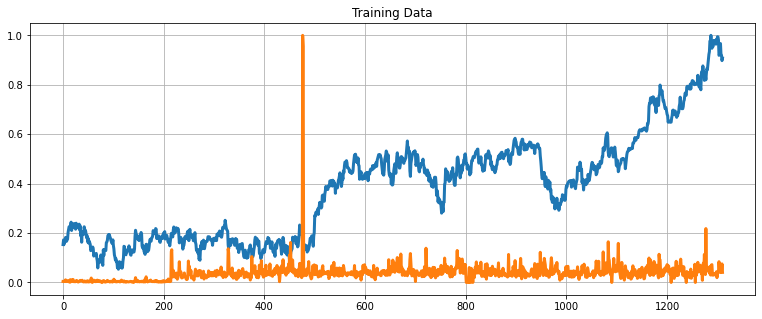

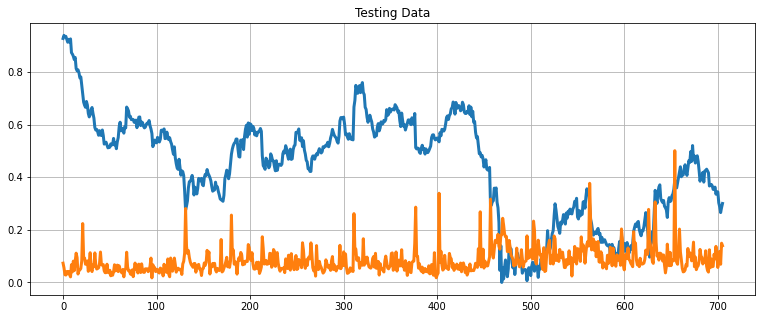

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize=(13, 5))
  plt.plot(data, linewidth=3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

## Ridge Linear Regression Model

In [ ]:
from sklearn.linear_model import Ridge
# Create and train the Ridge Linear Regression Model
regression_model = Ridge(alpha=.2)
regression_model.fit(X_train, y_train)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
lr_accuracy = regression_model.score(X_test, y_test)
print(f'Ridge Regression Score: {lr_accuracy}')

Ridge Regression Score: 0.9803738426745323


In [ ]:
# Make prediction
ambev_prediction = regression_model.predict(X)
ambev_prediction

array([[0.15485555],
       [0.17385676],
       [0.15587445],
       ...,
       [0.26662457],
       [0.28544664],
       [0.30092806]])

In [ ]:
prediction = []
for i in ambev_prediction:
  prediction.append(i[0])

len(prediction)

2017

In [ ]:
close = []
for i in ambev_scaled:
  close.append(i[0])

len(close)

2017

In [ ]:
df_ambev_prediction = pd.DataFrame(ambev.index)
df_ambev_prediction['Close'] = close
df_ambev_prediction['Prediction'] = prediction
df_ambev_prediction

,Date,Close,Prediction
0,2013-01-02,0.153168,0.154856
1,2013-01-03,0.172256,0.173857
2,2013-01-04,0.154193,0.155874
3,2013-01-07,0.166619,0.168245
4,2013-01-08,0.165338,0.166970
...,...,...,...
2012,2021-02-25,0.302649,0.303533
2013,2021-02-26,0.287107,0.288059
2014,2021-03-01,0.265521,0.266625
2015,2021-03-02,0.284517,0.285447


In [ ]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# Plot the results
interactive_plot(df_ambev_prediction, 'Real Price vs. Prediction')

In [ ]:
# Plot the results
magalu = concat_stock(stock_prices, stock_volumes, 'MGLU3')
magalu = target(magalu)
magalu

,Close,Volume,Target
Date,,,
2013-01-02,0.362545,23622400.0,0.377499
2013-01-03,0.377499,30777600.0,0.375242
2013-01-04,0.375242,17756800.0,0.366495
2013-01-07,0.366495,23110400.0,0.363956
2013-01-08,0.363956,27945600.0,0.358313
...,...,...,...
2021-02-26,24.180000,45690100.0,24.549999
2021-03-01,24.549999,22131200.0,24.270000
2021-03-02,24.270000,35351400.0,25.120001


In [ ]:
magalu = magalu[:-1]
magalu

,Close,Volume,Target
Date,,,
2013-01-02,0.362545,23622400.0,0.377499
2013-01-03,0.377499,30777600.0,0.375242
2013-01-04,0.375242,17756800.0,0.366495
2013-01-07,0.366495,23110400.0,0.363956
2013-01-08,0.363956,27945600.0,0.358313
...,...,...,...
2021-02-25,24.049999,57969900.0,24.180000
2021-02-26,24.180000,45690100.0,24.549999
2021-03-01,24.549999,22131200.0,24.270000


In [ ]:
magalu_scaled = sc.fit_transform(magalu)
magalu_scaled.shape

(2017, 3)

In [ ]:
X = magalu_scaled[:, :2]
y = magalu_scaled[:, 2:]

X

array([[0.01216887, 0.0548766 ],
       [0.01271477, 0.07149866],
       [0.01263238, 0.04125037],
       ...,
       [0.89517309, 0.05141243],
       [0.88495126, 0.08212394],
       [0.91598197, 0.1096382 ]])

In [ ]:
y

array([[0.01271477],
       [0.01263238],
       [0.01231306],
       ...,
       [0.88495126],
       [0.91598197],
       [0.92182304]])

In [ ]:
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
print(f'X shape:{X.shape} \ny shape:{y.shape} \n\n\nX_train shape:{X_train.shape} \ny_train shape:{y_train.shape}\n\n\nX_test shape:{X_test.shape} \ny_test shape:{y_test.shape}')


X shape:(2017, 2) 
y shape:(2017, 1) 


X_train shape:(1311, 2) 
y_train shape:(1311, 1)


X_test shape:(706, 2) 
y_test shape:(706, 1)


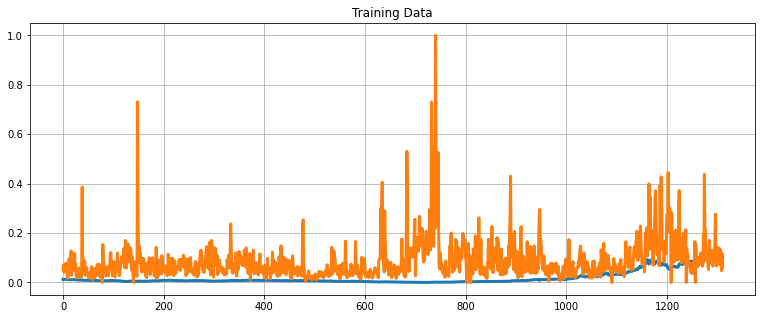

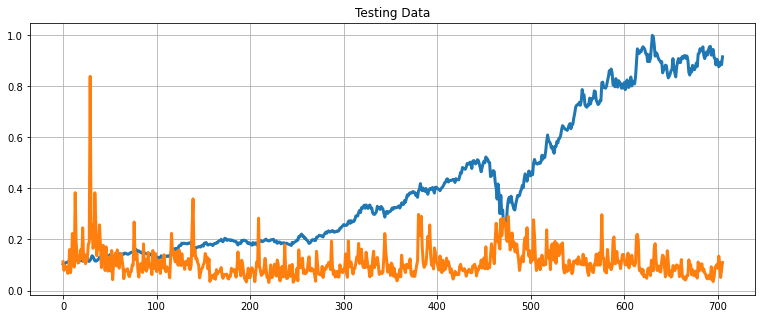

In [ ]:
show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [ ]:
regression_model = Ridge(alpha=.01)
regression_model.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
lr_accuracy = regression_model.score(X_test, y_test)
print(f'Ridge Regression Score: {lr_accuracy}')

Ridge Regression Score: 0.9968320507267844


In [ ]:
# Make prediction
magalu_prediction = regression_model.predict(X)
magalu_prediction


array([[0.01223548],
       [0.01280811],
       [0.01266886],
       ...,
       [0.8872622 ],
       [0.87719112],
       [0.90799411]])

In [ ]:
prediction = []
for i in magalu_prediction:
  prediction.append(i[0])

len(prediction)

2017

In [ ]:
close = []
for i in magalu_scaled:
  close.append(i[0])

len(close)

2017

In [ ]:
df_magalu_prediction = pd.DataFrame(magalu.index)
df_magalu_prediction['Close'] = close
df_magalu_prediction['Prediction'] = prediction
df_magalu_prediction

,Date,Close,Prediction
0,2013-01-02,0.012169,0.012235
1,2013-01-03,0.012715,0.012808
2,2013-01-04,0.012632,0.012669
3,2013-01-07,0.012313,0.012376
4,2013-01-08,0.012220,0.012306
...,...,...,...
2012,2021-02-25,0.876920,0.869332
2013,2021-02-26,0.881666,0.873981
2014,2021-03-01,0.895173,0.887262
2015,2021-03-02,0.884951,0.877191


In [ ]:
interactive_plot(df_magalu_prediction, 'Real Price vs. Prediction')